<a href="https://colab.research.google.com/github/Patil-data/Shopping-Mall-Segmentation/blob/main/Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files

# Upload your ZIP file (like archive.zip)
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [4]:
import zipfile  # <-- This line is required

# Extract the ZIP file
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Check what was extracted
import os
print("Extracted files:", os.listdir("/content"))


Extracted files: ['.config', 'customer_data.xlsx', 'shopping_mall_data.xlsx', 'archive.zip', 'sales_data.xlsx', 'archive (1).zip', 'sample_data']


In [6]:
import os
print(os.listdir('/content'))


['.config', 'customer_data.xlsx', 'shopping_mall_data.xlsx', 'archive.zip', 'sales_data.xlsx', 'archive (1).zip', 'sample_data']


In [7]:
!pip install openpyxl


In [8]:
import pandas as pd

df = pd.read_excel('/content/shopping_mall_data.xlsx')
df.head()


,shopping_mall,construction_year,area (sqm),location,store_count
0,South Coast Plaza,1967,250000,Costa Mesa,270
1,Westfield Valley Fair,1986,220000,Santa Clara,230
2,The Grove,2002,56000,Los Angeles,140
3,Westfield Century City,1964,133000,Los Angeles,200
4,Beverly Center,1982,111000,Los Angeles,160


In [9]:
df.columns


Index(['shopping_mall', 'construction_year', 'area (sqm)', 'location',
       'store_count'],
      dtype='object')

In [10]:
X = df[['area (sqm)', 'store_count']]


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


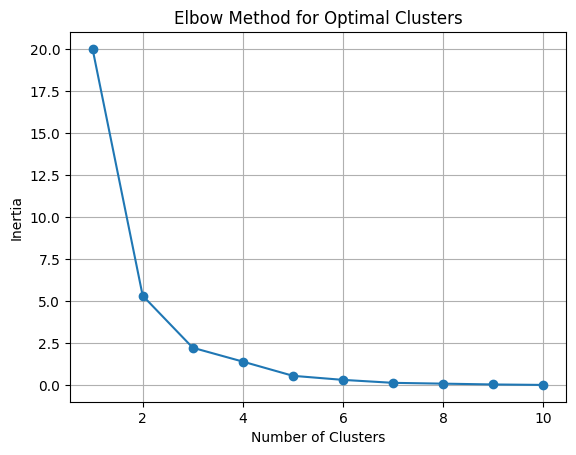

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Change to best 'k' from elbow
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()


,shopping_mall,construction_year,area (sqm),location,store_count,Cluster
0,South Coast Plaza,1967,250000,Costa Mesa,270,1
1,Westfield Valley Fair,1986,220000,Santa Clara,230,1
2,The Grove,2002,56000,Los Angeles,140,2
3,Westfield Century City,1964,133000,Los Angeles,200,0
4,Beverly Center,1982,111000,Los Angeles,160,2


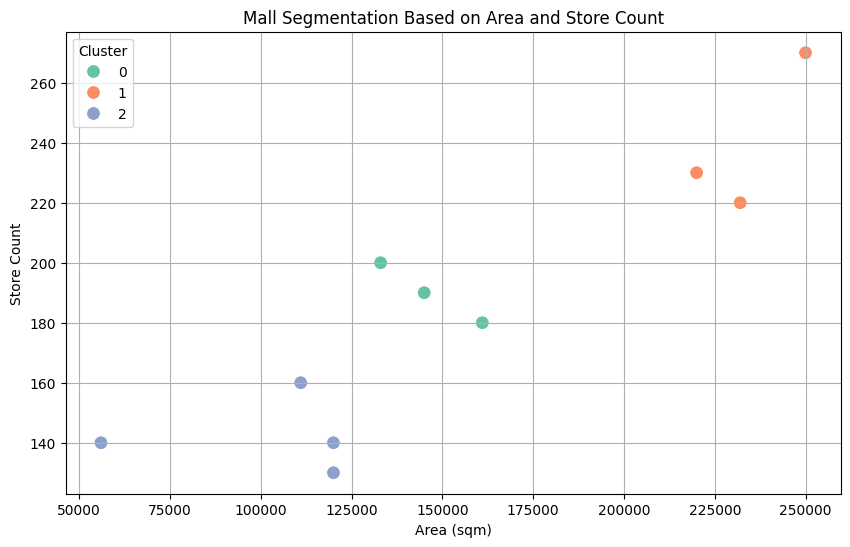

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area (sqm)', y='store_count', hue='Cluster', palette='Set2', s=100)
plt.title('Mall Segmentation Based on Area and Store Count')
plt.xlabel('Area (sqm)')
plt.ylabel('Store Count')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [15]:
df.to_csv('clustered_malls.csv', index=False)


In [16]:
df.groupby('Cluster')[['area (sqm)', 'store_count']].mean()


,area (sqm),store_count
Cluster,,
0,146333.333333,190.0
1,234000.000000,240.0
2,101750.000000,142.5


In [19]:
print("""
Conclusion:

- Cluster 0 represents large, multi-store malls - ideal for premium retail.
- Cluster 1 includes smaller, compact malls - likely in dense urban zones.
- Cluster 2 shows mid-sized malls - standard across regional centers.

These insights can guide investment, renovation, or targeted leasing strategies.
""")




Conclusion:

- Cluster 0 represents large, multi-store malls - ideal for premium retail.
- Cluster 1 includes smaller, compact malls - likely in dense urban zones.
- Cluster 2 shows mid-sized malls - standard across regional centers.

These insights can guide investment, renovation, or targeted leasing strategies.



In [20]:
df.to_csv('Segmented_Malls.csv', index=False)



In [21]:
from google.colab import files
files.download('Segmented_Malls.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>